## Import TensorFlow

In [1]:
import tensorflow as tf

In [2]:
#Checking TF version
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


## Dataset
#### Import MNIST

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:',y_test.shape)

NameError: name 'x_train' is not defined

## Plot an Image Example

In [ ]:
# %pip install matplotlib


In [ ]:
from matplotlib import pyplot as plt
#%matplotlib inline  
# to ensure the plot remains within the notebook

plt.imshow(x_train[0], cmap='binary')  # reading the first training example
plt.show() # display the plot

plt.imshow(x_train[1], cmap='binary')  # reading the second training example
plt.show() # display the plot

## Display Labels

In [ ]:
y_train[0]

In [ ]:
print(set(y_train))  # see classes of training set i.e. numbers 0-9

# One Hot Encoding

#### After this encoding, every label will be converted to a list of 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:
eg. 5 (original label) will be set to the one-hot encoded label [0,0,0,0,0,1,0,0,0,0]

### Encoding Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# encoding both train and test sets
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


### Validated Shapes

In [ ]:
# Turning each label (y_train_encoded) into a 10 dimenesional vector

print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

### Display Encoded Labels

In [ ]:
# Now, every number has a class i.e. a switch 1 or 0. This makes it a classification problem

y_train_encoded[0]

# Task 4: Neural Networks

### Linear Equations
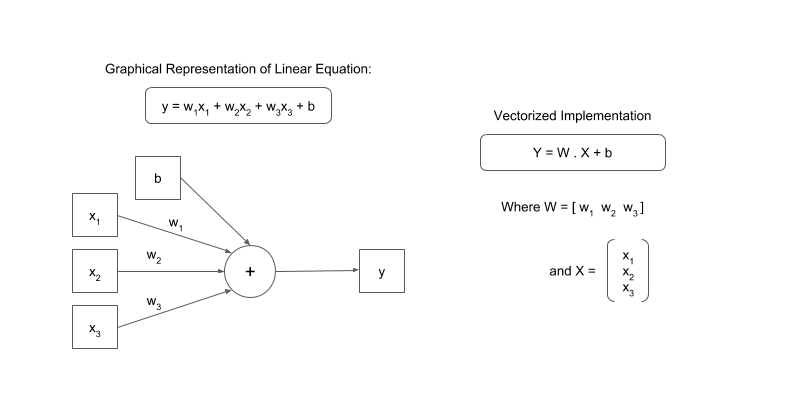

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

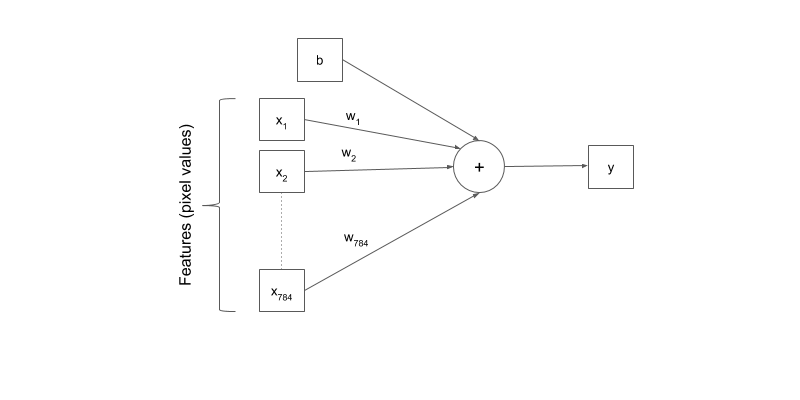

### Neural Networks
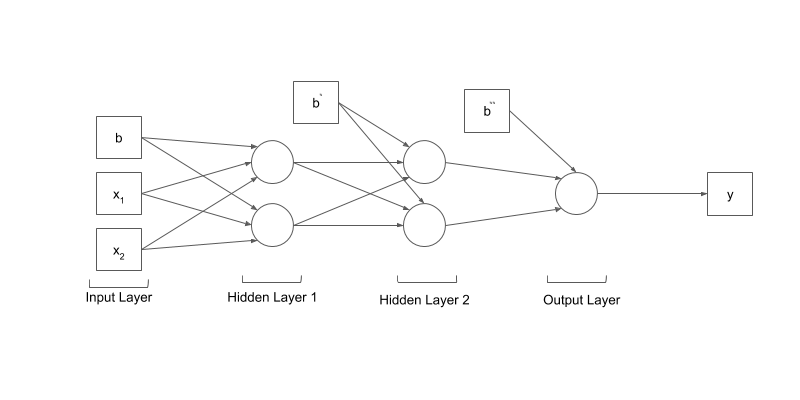
This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

## Preprocessing the Examples

#### Unrolling N-dimensional Arrays to Vectors

In [ ]:
# shape : 28 * 28

# to convert to 784 * 1 shape

import numpy as np


In [ ]:

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape:',x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)


#### Display Pixel Values


In [ ]:
print(set(x_train_reshaped[0]))

### Data Normalization


In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# define a constant
epsilon = 1e-10

# normalize x_train
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)

In [ ]:
# normalizing x_test : 

x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [ ]:
print(set(x_train_norm[0]))  # after normalization, the training set's scale is shrunk down

## Creating a Model

#### Creating a model

In [ ]:
#  import the sequential class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    # hidden layer 1 - 128 nodes of the input layer shape i.e. 784 dimensions or input features
    Dense(128, activation='relu', input_shape=(784,)),
    # hidden layer 2
    Dense(128, activation='relu'),
    # output layer
    Dense(10, activation='softmax')
])  

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

![image.png](attachment:image.png)

### Compiling the Model

#### Compiling the Model

In [ ]:
model.compile(
    optimizer='sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

## Training the Model

#### Training the model

In [ ]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

#### Evaluating the model

In [ ]:
# uses model, forward passes to compare on test set with encoded labels
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

# to check if accuracy has memorized model
print('Test set accuracy:', accuracy*100)

## Predictions

#### Predictions on Test Set


In [ ]:
# just want the predictions 
pred = model.predict(x_test_norm)
print('Shape of pred:', pred.shape)

#### Plotting the results

In [ ]:
# plot few sets of images and their predictions
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    predic = np.argmax(pred[start_index + i])
    #ground truth
    gt = y_test[start_index + i]
    col = 'g'

    if predic != gt:
        col = 'r'
    plt.xlabel('i={}, predic={}, gt={}'.format(start_index+i, predic, gt, color = col))
    plt.imshow(x_test[start_index+i], cmap='binary')  # to show exact pixels 28*255
    plt.show()

In [ ]:
plt.plot(pred[8])
plt.show()



#softmax predictability outputs